# Практика по определению моделей в Keras

В каждом из заданий ниже, реализуйте модель, повторяющую структуру модели на приложенной картинке. При определении моделей, можете использовать как Sequential так и Functional API.

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
import numpy as np

#tf.enable_eager_execution()

## Задание 1

Реализуйте модель описанную ниже. Активацию последнего слоя сделайте "softmax".

<img src="https://drive.google.com/uc?export=view&id=1QCKcPlmguNNXPvUQnUaphcfOTWvQKzEW" width=200>
<img src="https://drive.google.com/uc?export=view&id=1r6DoTrn8Pe2RKuPT3RM9rR8Xc2X3WNVe" width=400>


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 4)                 44        
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_10 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 51        
Total params: 279
Trainable params: 279
Non-trainable params: 0
_________________________________________________________________


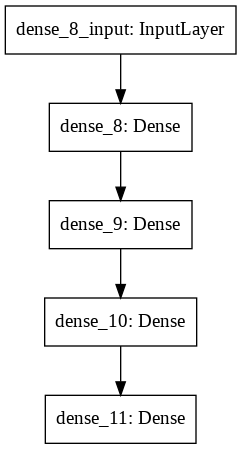

In [6]:
model = tf.keras.Sequential()
model.add(Dense(4, input_shape=(10,)))
model.add(Dense(8,))
model.add(Dense(16,))
model.add(Dense(3, activation="softmax")) # выходной слой

model.summary()
tf.keras.utils.plot_model(model, show_shapes=False)

In [12]:
output = model(np.ones((3, 10)))
assert np.allclose(output.numpy().sum(1),  np.ones(3)), "Did you forget softmax in the last layer?"
assert model.count_params() == 279, "Wrong params number"
print("Simple tests passed")

Simple tests passed


## Задание 2

Реализуйте модель описанную ниже.

<img src="https://lh3.googleusercontent.com/Aa_RCQNbksP9j27Br0kbq-Aj_yWHW3fofmaZj6jOm8xBLgWrEn60MbxVBkfZipLJ5mI3LAMC9wdhv08i76oKY6cQzUdYVHyRzLV4dZ8Yw-TIC6Y82gLe1zmdwzpX2JkFmo-nJy6YPLGiZuqkjKJlTdtHdFdDuIp_akK2fSMEMf85u3_3N-Gx6XSTxaQsCX5PL8aWlNeDl5rpHhmQYBTe1TR2-EDsAMgz4CLBMwyhVPJwjBR57WOBw14NPp6RrayuaPSltd9qbvQG2236WKqyL0w__y6tR6Vg7WMtUm4SKrPbTSUUyEEvU1hH6Z6yQpgyRRXecdupmTyx3FySqgERRVIqEb-JNoLppqzcaBEHDKdi0I7tQuuKXVyjSq5P02McLEwR7ej3dKVC8R3EsFDZV8uVLWJQSdpvInhp5d0fGb5u-UOfRuJ1X_4s2A6BJPbWbj4NyQAWPFem02A2Ya4CpzgDbMnjiAmlt_-JavcPCi7UALu6mH_RzPgNkzlrSqEMHpdBnVs6vhtEQGoZU1kxARvZxfBnbXTudg0IYjZ-LBKEfEFRwN3pbC3A9xnPS_-LRXcvAy45VSgH_JgPV4PpBFwo-xVg6O1RUhbOBuR8_a9OOyLd2zN8NaLO4e4bxq8pHD9mIXXBrxxCK76pjO5Vs2m03h-U7o6VTci3Fr9U5f2rF4ejP_7pNtSwfZ3RRA=w646-h220-no?authuser=0" width=400>
<img src="https://drive.google.com/uc?export=view&id=1vR3XfyYEpSmgEXZoLGY_FfWRwgOiefoj" width=300>


*Кстати, такая кострукция не лишена смысла -- в следующем модуле мы увидим как она помогла совершить прорыв в классификации изображений. Она носит название residual block*


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input (InputLayer)              [(None, 10)]         0                                            
__________________________________________________________________________________________________
Layer1 (Dense)                  (None, 10)           110         Input[0][0]                      
__________________________________________________________________________________________________
add_2 (Add)                     (None, 10)           0           Input[0][0]                      
                                                                 Layer1[0][0]                     
Total params: 110
Trainable params: 110
Non-trainable params: 0
__________________________________________________________________________________________________
Simple tests passed


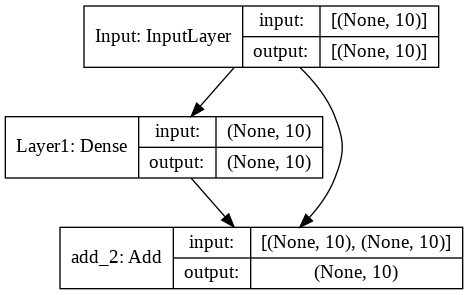

In [15]:
# cпециальный Инпут слой, показывает keras куда "положить" данные при использовании модели
input_layer = tf.keras.layers.Input(shape=(10, ), name="Input")
dense_layer = Dense(10)

l1_output = Dense(10, name="Layer1")(input_layer)
output = tf.keras.layers.Add()([input_layer, l1_output])

model = tf.keras.Model(inputs=input_layer, outputs=output)

model.summary()
assert model.count_params() == 110, "Wrong params number"
print("Simple tests passed")
tf.keras.utils.plot_model(model, show_shapes=True)

## Задание 3

Реализуйте модель описанную ниже. Вам пригодится tf.keras.layers.Concatenate.

<img src="https://drive.google.com/uc?export=view&id=1LvsTd2a0HW-duuv3UyxCBLmERpqQQweU" width=450>
<img src="https://drive.google.com/uc?export=view&id=18IMatPWKG-0T9gisyJ_k465mospO_xow" width=400>


Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input (InputLayer)              [(None, 10)]         0                                            
__________________________________________________________________________________________________
Layer1 (Dense)                  (None, 10)           110         Input[0][0]                      
__________________________________________________________________________________________________
Layer2 (Dense)                  (None, 10)           110         Input[0][0]                      
__________________________________________________________________________________________________
Layer3 (Dense)                  (None, 10)           110         Layer1[0][0]                     
____________________________________________________________________________________________

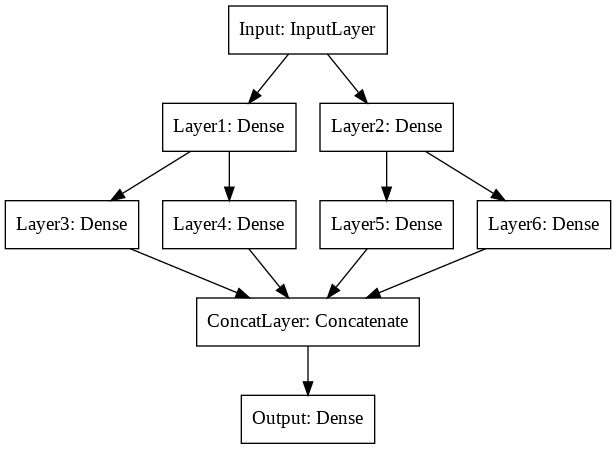

In [20]:
input_layer = tf.keras.layers.Input(shape=(10,), name="Input")
dense_layer = Dense(10)

l1_output = Dense(10, name="Layer1")(input_layer)
l2_output = Dense(10, name="Layer2")(input_layer)

l3_output = Dense(10, name="Layer3")(l1_output)
l4_output = Dense(10, name="Layer4")(l1_output)

l5_output = Dense(10, name="Layer5")(l2_output)
l6_output = Dense(10, name="Layer6")(l2_output)

l7_output = tf.keras.layers.Concatenate(name="ConcatLayer")([l3_output, l4_output, l5_output, l6_output])

l8_output = Dense(3, name="Output")(l7_output)

model = tf.keras.Model(inputs=input_layer, outputs=l8_output)

model.summary()
assert model.count_params() == 783, "Wrong params number"
print("Simple tests passed")
tf.keras.utils.plot_model(model, show_shapes=False)